# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet('/content/Dataset/yellow_tripdata_2023-01.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
import os
import pandas as pd

# Define the folder containing parquet files
folder_path = '/content/Dataset'
file_list = sorted([f for f in os.listdir(folder_path) if f.endswith('.parquet') and f.startswith('yellow_tripdata_2023')])

sampled_data = []

for file in file_list:
    print(f"Processing {file}")
    file_path = os.path.join(folder_path, file)

    # Load the parquet file
    df = pd.read_parquet(file_path)

    # Parse datetime columns
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

    # Drop rows with invalid datetime values
    df = df.dropna(subset=["tpep_pickup_datetime", "tpep_dropoff_datetime"])

    # Add pickup hour and date for potential later use
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    df['pickup_date'] = df['tpep_pickup_datetime'].dt.date

    # Sample first 10,000 rows
    sample_df = df.head(10000)

    sampled_data.append(sample_df)

# Combine all sampled DataFrames into one
df_sampled_all = pd.concat(sampled_data, ignore_index=True)


Processing yellow_tripdata_2023-01.parquet
Processing yellow_tripdata_2023-02.parquet
Processing yellow_tripdata_2023-03.parquet
Processing yellow_tripdata_2023-04.parquet
Processing yellow_tripdata_2023-05.parquet
Processing yellow_tripdata_2023-06.parquet
Processing yellow_tripdata_2023-07.parquet
Processing yellow_tripdata_2023-08.parquet
Processing yellow_tripdata_2023-09.parquet
Processing yellow_tripdata_2023-10.parquet
Processing yellow_tripdata_2023-11.parquet
Processing yellow_tripdata_2023-12.parquet


In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
file_path = '/content/Dataset'

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
df_sampled_all.to_parquet("sampled_nyc_taxi_2023.parquet")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df = pd.read_parquet("sampled_nyc_taxi_2023.parquet")


In [ ]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        4.00           0.0   
2             1  ...      0.5       15.00           0.0   
3             1  ...      0.5        0.00           0.0   
4             1  ...      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         14.30                   2.5         0.00   
1                    1.0         16.90                   2.5         0.00   
2                    1.0         34.90                   2.5         0.00   
3                    1.0         20.85                   0.0         1.25   
4                    1.0         19.68                   2.5         0.00   

   pickup_hour  pickup_date  Airport_fee  
0            0   2023-01-01          NaN  
1            0   2023-01-01          NaN  
2            0   2023-01-01          NaN  
3            0   2023-01-01          NaN  
4            0   2023-01-01          NaN  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               120000 non-null  int64         
 1   tpep_pickup_datetime   120000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  120000 non-null  datetime64[us]
 3   passenger_count        120000 non-null  float64       
 4   trip_distance          120000 non-null  float64       
 5   RatecodeID             120000 non-null  float64       
 6   store_and_fwd_flag     120000 non-null  object        
 7   PULocationID           120000 non-null  int64         
 8   DOLocationID           120000 non-null  int64         
 9   payment_type           120000 non-null  int64         
 10  fare_amount            120000 non-null  float64       
 11  extra                  120000 non-null  float64       
 12  mta_tax                120000 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
if 'airport_fee' in df.columns and 'Airport_fee' in df.columns:
    df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
    df.drop('Airport_fee', axis=1, inplace=True)



**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative

negatives = df[df['fare_amount'] < 0]
print("Number of rows with negative fare_amount:", len(negatives))
print(negatives['fare_amount'].head())

Number of rows with negative fare_amount: 1636
132    -5.1
263    -9.3
324   -25.4
620    -5.1
923    -7.2
Name: fare_amount, dtype: float64


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

print(negatives['RatecodeID'].value_counts())

RatecodeID
1.0    1490
2.0      80
5.0      44
4.0      11
3.0      11
Name: count, dtype: int64


In [ ]:
# Find which columns have negative values

money_cols_all = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                  'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

money_cols = [col for col in money_cols_all if col in df.columns]
negatives = df[df[money_cols].lt(0).any(axis=1)]

print("Number of rows with negative values:", len(negatives))
print(negatives[['fare_amount', 'RatecodeID']].head())



Number of rows with negative values: 1643
     fare_amount  RatecodeID
132         -5.1         1.0
263         -9.3         1.0
324        -25.4         1.0
620         -5.1         1.0
923         -7.2         1.0


In [ ]:
# fix these negative values

df = df[df['fare_amount'] >= 0]
df = df[df['total_amount'] >= 0]


In [ ]:
#Recheck
negatives = df[df['fare_amount'] < 0]
print("Number of rows with negative fare_amount:", len(negatives))

Number of rows with negative fare_amount: 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
print("Missing values proportion:")
print(df.isnull().mean())


Missing values proportion:
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
pickup_hour              0.0
pickup_date              0.0
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values

display(df[df['passenger_count'].isna()].head())

# Impute NaN values in 'passenger_count'
df['passenger_count'] = df['passenger_count'].fillna(1)
df = df[df['passenger_count'] > 0]



Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_hour, pickup_date]
Index: []

[0 rows x 21 columns]

Did you find zeroes in passenger_count? Handle these.

In [ ]:
# Check number of missing values in 'passenger_count'
print("Missing values in 'passenger_count':", df['passenger_count'].isna().sum())


Missing values in 'passenger_count': 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
mode_ratecode = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(mode_ratecode)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge

mode_congestion_surcharge = df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(mode_congestion_surcharge)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values

for col in df.columns:
    if df[col].isna().any():
        mode_vals = df[col].mode()
        fallback_value = mode_vals[0] if not mode_vals.empty else 0
        df[col] = df[col].fillna(fallback_value)



In [ ]:
# Check if any column has missing values
missing_summary = df.isna().sum()
missing_columns = missing_summary[missing_summary > 0]

if not missing_columns.empty:
    print("Columns with missing values:")
    print(missing_columns)
else:
    print("No missing values found in the DataFrame.")


No missing values found in the DataFrame.


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df = df[df['trip_distance'] <= 100]
df = df[df['trip_distance'] >= 0]
df = df[df['fare_amount'] <= 500]


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [ ]:
# Continue with outlier handling
zero_dist_diff_zones = df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])]


In [ ]:
# Do any columns need standardising?

import pandas as pd
from sklearn.preprocessing import StandardScaler

cols_to_check = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
std_dev = df[cols_to_check].std()
threshold = 1.0
cols_to_standardize = std_dev[std_dev > threshold].index.tolist()

if cols_to_standardize:
    print(f"Columns to be standardized: {cols_to_standardize}")
    scaler = StandardScaler()
    df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])
else:
    print("No columns require standardization.")


Columns to be standardized: ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']


In [ ]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_hour',
 'pickup_date']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

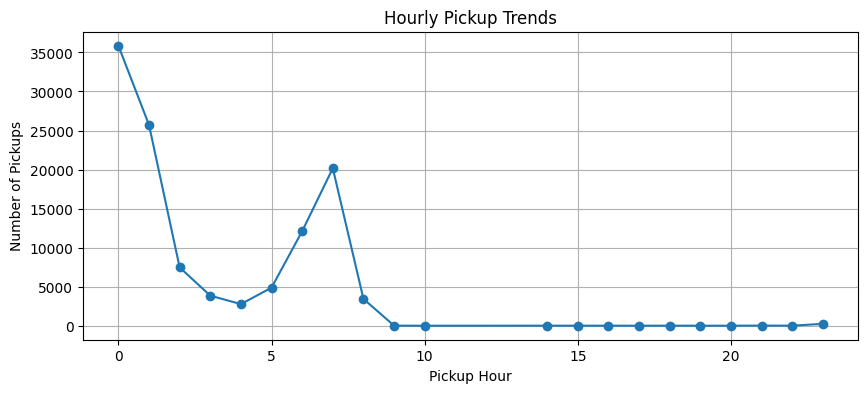

In [ ]:
# Find and show the hourly trends in taxi pickups

pickup_counts_by_hour = df['pickup_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 4))
pickup_counts_by_hour.plot(kind='line', marker='o')

plt.title('Hourly Pickup Trends')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Pickups')

plt.grid(True)
plt.show()


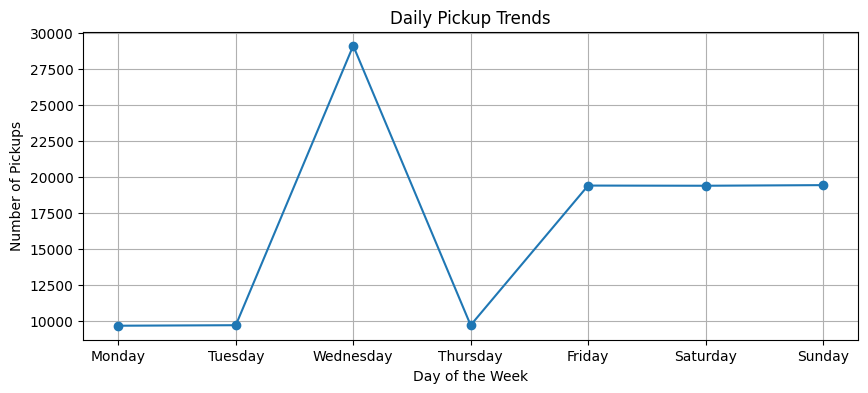

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)


df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pickup_counts_by_day = df['pickup_day'].value_counts()[day_order]
plt.figure(figsize=(10, 4))
pickup_counts_by_day.plot(kind='line', marker='o')

plt.title('Daily Pickup Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')

plt.grid(True)
plt.show()


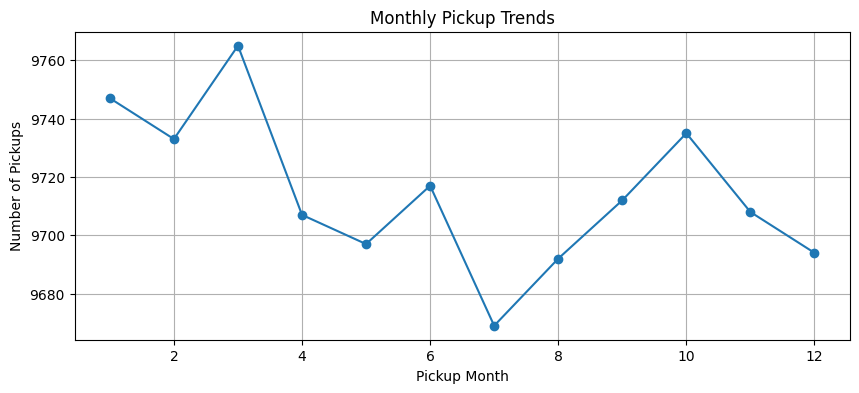

In [ ]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
pickup_counts_by_month = df['pickup_month'].value_counts().sort_index()
plt.figure(figsize=(10, 4))
pickup_counts_by_month.plot(kind='line', marker='o')

plt.title('Monthly Pickup Trends')
plt.xlabel('Pickup Month')
plt.ylabel('Number of Pickups')

plt.grid(True)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters

neg_mask = (
    (df_sampled_all['fare_amount'] < 0) |
    (df_sampled_all['tip_amount'] < 0) |
    (df_sampled_all['total_amount'] < 0)
)

negatives_df = df_sampled_all[neg_mask]
print(f"Total rows with negative financial values: {len(negatives_df)}")

df_cleaned = df_sampled_all[~neg_mask]

df_cleaned = df_cleaned[df_cleaned['trip_distance'] > 0]

print("\nAfter cleaning, rows with negative financial values remaining:",
      (df_cleaned['fare_amount'] < 0).sum())

cleaned_table = df_cleaned[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']]
print("\nCleaned Data Table:")
print(cleaned_table.head())

print("\nCleaned Data Description:")
print(cleaned_table.describe())


Total rows with negative financial values: 1643

After cleaning, rows with negative financial values remaining: 0

Cleaned Data Table:
   fare_amount  tip_amount  total_amount  trip_distance
0          9.3        0.00         14.30           0.97
1          7.9        4.00         16.90           1.10
2         14.9       15.00         34.90           2.51
3         12.1        0.00         20.85           1.90
4         11.4        3.28         19.68           1.43

Cleaned Data Description:
         fare_amount     tip_amount   total_amount  trip_distance
count  116364.000000  116364.000000  116364.000000  116364.000000
mean       19.842453       3.458826      28.606371       3.957144
std        18.661290       4.527263      22.974415       4.821762
min         0.000000       0.000000       0.000000       0.010000
25%         8.600000       1.000000      15.480000       1.200000
50%        12.800000       2.700000      20.500000       2.100000
75%        22.600000       4.250000     

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Drop rows with invalid values (negative fare/tip/total, and non-positive total)
df_clean = df_sampled_all[
    (df_sampled_all['fare_amount'] > 0) &
    (df_sampled_all['tip_amount'] >= 0) &
    (df_sampled_all['total_amount'] > 0)
]


df_clean = df_clean[df_clean['trip_distance'] > 0]


In [ ]:
# Create a df with non zero entries for the selected parameters.

# List of financial columns you want to check
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Create a mask to filter out rows where any of the selected columns have zero or negative values
df_clean = df_sampled_all[
    (df_sampled_all[financial_cols] > 0).all(axis=1)  # Only keep rows where all selected columns are greater than zero
]

# Display the cleaned DataFrame (optional)
print(f"Rows remaining after cleaning: {len(df_clean)}")
print(df_clean[financial_cols].describe())


Rows remaining after cleaning: 89748
        fare_amount    tip_amount  total_amount  trip_distance
count  89748.000000  89748.000000  89748.000000   89748.000000
mean      19.366252      4.484588     29.215088       3.835605
std       17.928769      4.687687     23.156531       4.656073
min        3.000000      0.010000      5.400000       0.010000
25%        9.300000      2.300000     16.130000       1.230000
50%       12.800000      3.220000     20.900000       2.100000
75%       21.200000      5.000000     31.050000       4.080000
max      450.000000    669.660000    712.660000      96.270000


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

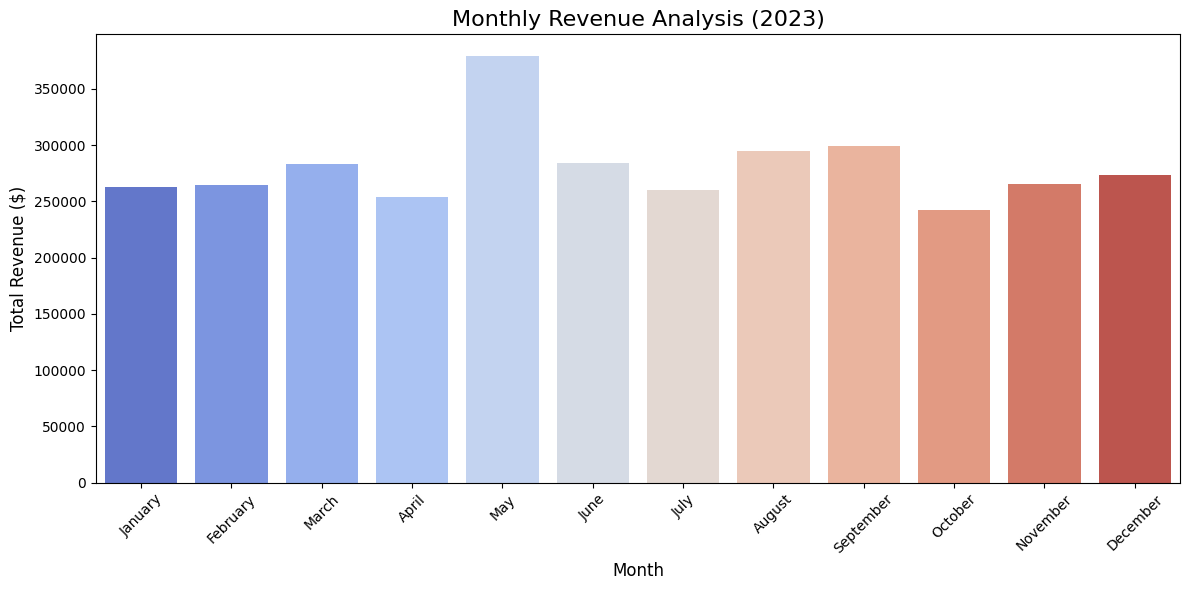

In [ ]:
# Group data by month and analyse monthly revenue

import calendar
df_sampled_all['tpep_pickup_datetime'] = pd.to_datetime(df_sampled_all['tpep_pickup_datetime'])
df_sampled_all['month'] = df_sampled_all['tpep_pickup_datetime'].dt.month
df_sampled_all['month_name'] = df_sampled_all['tpep_pickup_datetime'].dt.month_name()
monthly_revenue = df_sampled_all.groupby('month_name')['total_amount'].sum().reset_index()

month_order = list(calendar.month_name[1:])  # Get month names in correct order
monthly_revenue = monthly_revenue.set_index('month_name').reindex(month_order).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_revenue, x='month_name', y='total_amount', palette='coolwarm')
plt.title("Monthly Revenue Analysis (2023)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

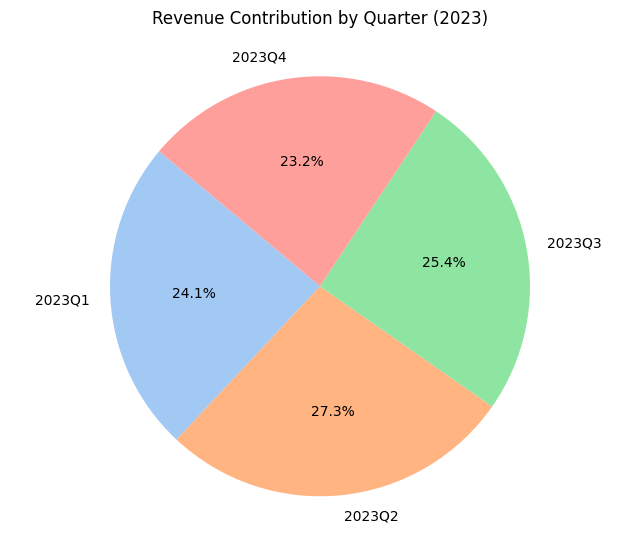

In [ ]:
# Calculate proportion of each quarter


df_sampled_all['tpep_pickup_datetime'] = pd.to_datetime(df_sampled_all['tpep_pickup_datetime'])
df_2023 = df_sampled_all[df_sampled_all['tpep_pickup_datetime'].dt.year == 2023].copy()
df_2023['quarter'] = df_2023['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue_2023 = df_2023.groupby('quarter')['total_amount'].sum().reset_index()
quarterly_revenue_2023.columns = ['Quarter', 'Total_Revenue']

quarterly_revenue_2023 = quarterly_revenue_2023[quarterly_revenue_2023['Total_Revenue'] > 0]

plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(quarterly_revenue_2023['Total_Revenue'], labels=quarterly_revenue_2023['Quarter'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue Contribution by Quarter (2023)', y=1.05)
plt.axis('equal')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [ ]:
df = df[df['trip_distance'] >= 0]
df = df[df['fare_amount'] >= 0]


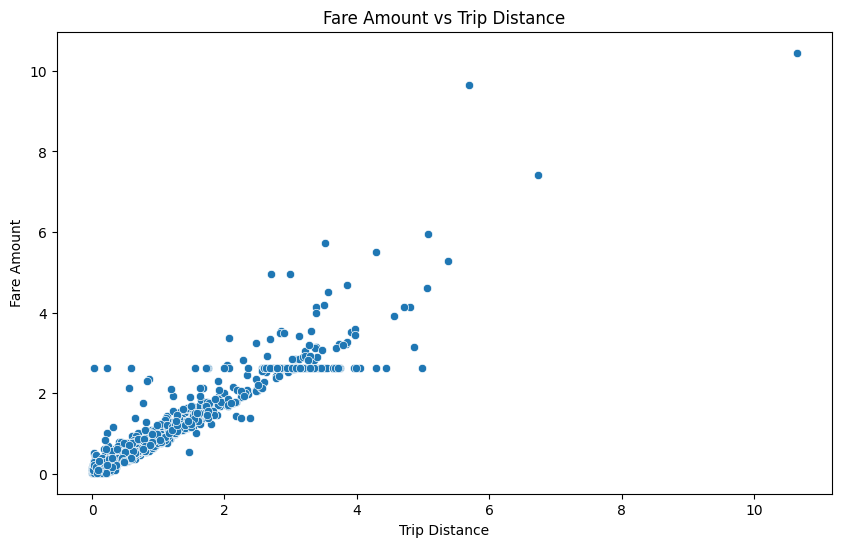

In [ ]:
# Show how trip fare is affected by distance

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(1000), x='trip_distance', y='fare_amount',)
plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

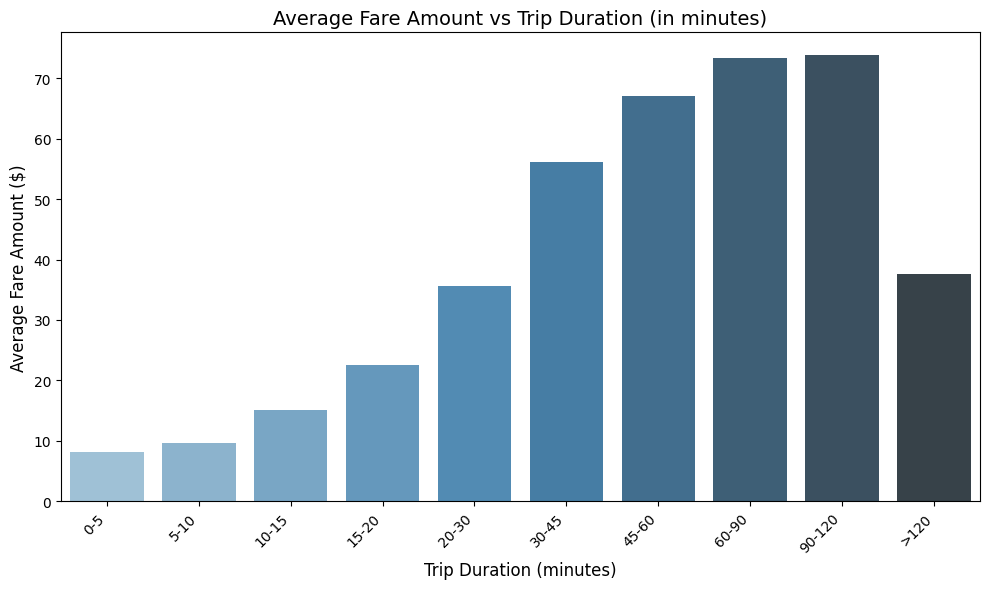

In [ ]:
# Show relationship between fare and trip duration

df_sampled_all['trip_duration_min'] = (
    pd.to_datetime(df_sampled_all['tpep_dropoff_datetime']) - pd.to_datetime(df_sampled_all['tpep_pickup_datetime'])
).dt.total_seconds() / 60
df_corr = df_sampled_all[[
    'fare_amount', 'trip_duration_min', 'passenger_count', 'tip_amount', 'trip_distance'
]].dropna()

bins = [0, 5, 10, 15, 20, 30, 45, 60, 90, 120, float('inf')]
labels = ['0-5', '5-10', '10-15', '15-20', '20-30', '30-45', '45-60', '60-90', '90-120', '>120']

df_corr['trip_duration_bins'] = pd.cut(df_corr['trip_duration_min'], bins=bins, labels=labels, right=False)
average_fare_per_duration = df_corr.groupby('trip_duration_bins')['fare_amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_fare_per_duration, x='trip_duration_bins', y='fare_amount', palette='Blues_d')
plt.title('Average Fare Amount vs Trip Duration (in minutes)', fontsize=14)
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Average Fare Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


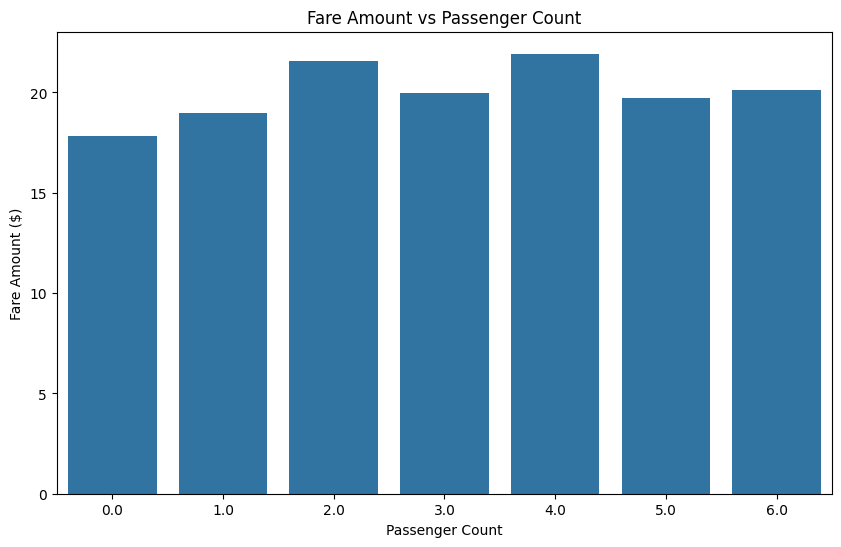

In [ ]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10,6))
sns.barplot(data=df_corr, x='passenger_count', y='fare_amount', errorbar=None)
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

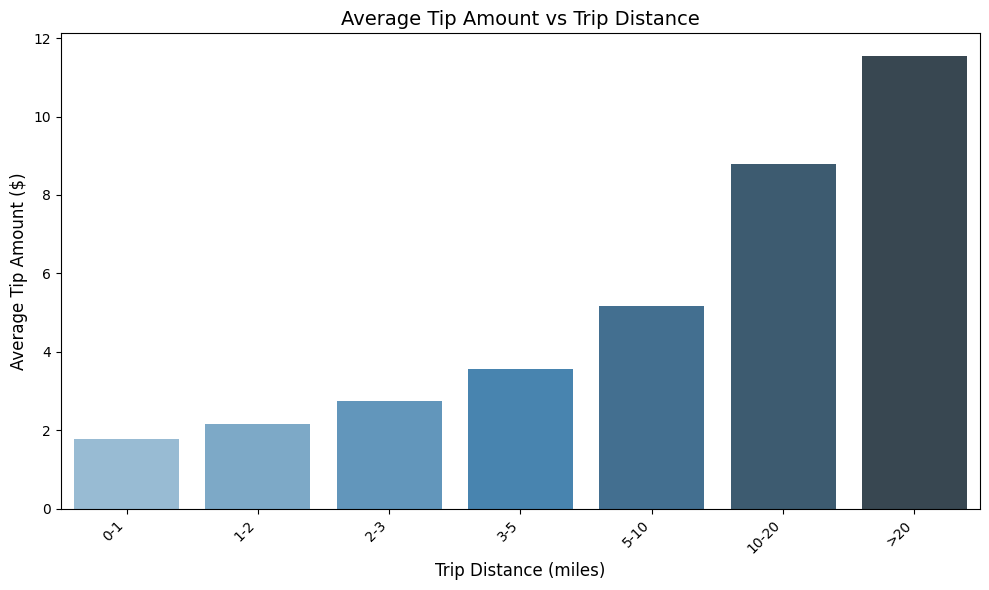

In [ ]:
# Show relationship between tip and trip distance

bins_distance = [0, 1, 2, 3, 5, 10, 20, float('inf')]
labels_distance = ['0-1', '1-2', '2-3', '3-5', '5-10', '10-20', '>20']

df_corr['trip_distance_bins'] = pd.cut(df_corr['trip_distance'], bins=bins_distance, labels=labels_distance, right=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='trip_distance_bins', y='tip_amount', data=df_corr, palette='Blues_d', errorbar=None)
plt.title('Average Tip Amount vs Trip Distance', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Average Tip Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

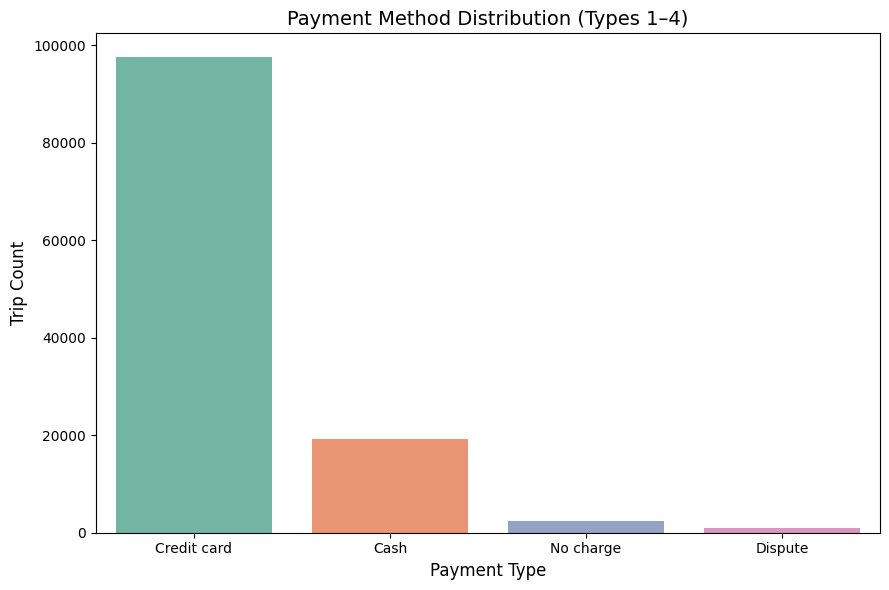

In [ ]:
# Analyse the distribution of different payment types (payment_type).

payment_labels = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute'
}

df_sampled_all['payment_type_label'] = df_sampled_all['payment_type'].map(payment_labels)
valid_payments_df = df_sampled_all[df_sampled_all['payment_type_label'].notnull()]
payment_counts = valid_payments_df['payment_type_label'].value_counts()

plt.figure(figsize=(9, 6))
sns.barplot(
    x=payment_counts.index,
    y=payment_counts.values,
    palette='Set2'
)

plt.title("Payment Method Distribution (Types 1–4)", fontsize=14)
plt.xlabel("Payment Type", fontsize=12)
plt.ylabel("Trip Count", fontsize=12)
plt.xticks(ticks=range(len(payment_labels)), labels=list(payment_labels.values()), rotation=0)
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import zipfile

with zipfile.ZipFile('/content/Dataset/taxi_zones.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Dataset/taxi_zones')


In [ ]:
import geopandas as gpd

zones = gpd.read_file('/content/Dataset/taxi_zones/taxi_zones.shp')
zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

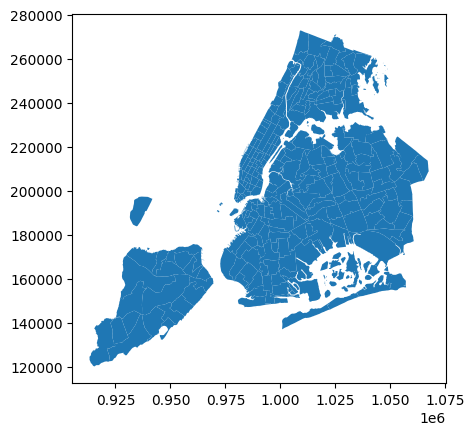

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID

pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

zones_with_trips = zones.merge(pickup_counts, left_on='LocationID', right_on='LocationID', how='left')


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

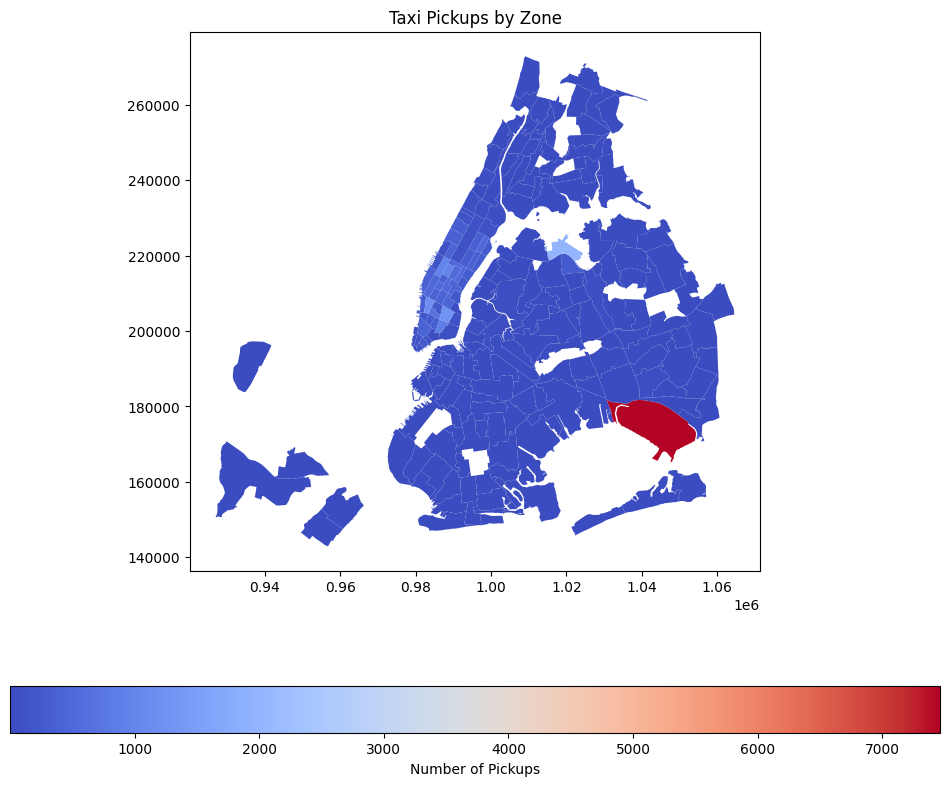

In [ ]:
# Group data by location and calculate the number of trips

pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

zones_with_trips = zones.merge(pickup_counts, left_on='PULocationID', right_on='LocationID', how='left')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(column='pickup_count', ax=ax, legend=True,
                     legend_kwds={'label': "Number of Pickups",
                                 'orientation': "horizontal"},
                     cmap='coolwarm')

plt.title('Taxi Pickups by Zone')
plt.show()


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

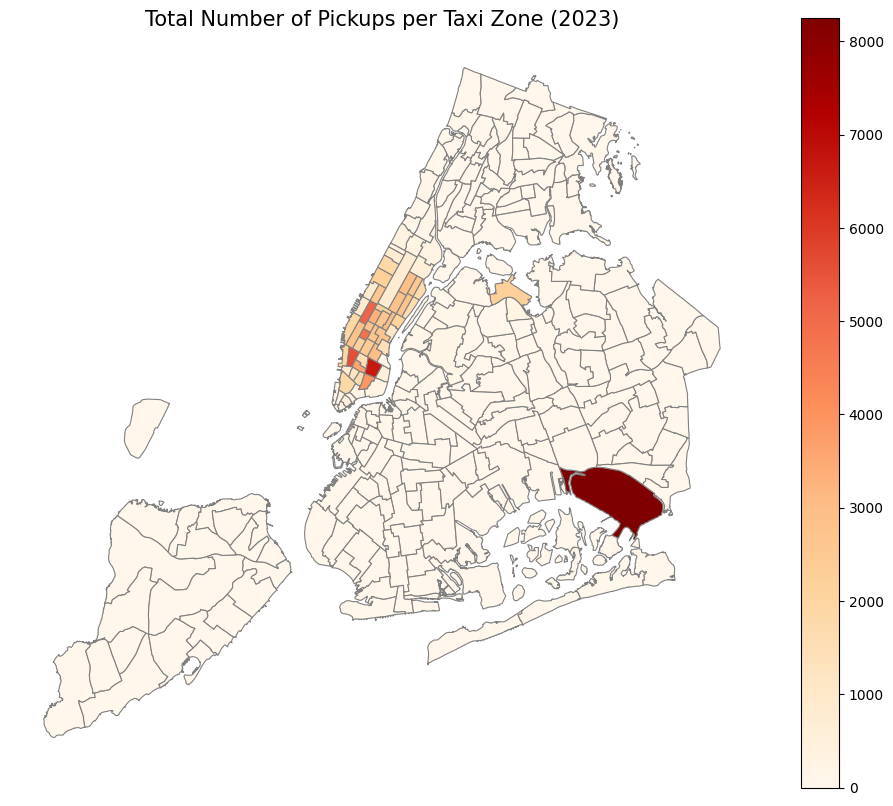

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

zone_trip_counts = df_sampled_all.groupby('PULocationID').size().reset_index(name='trip_count')
zones = zones.rename(columns={'LocationID': 'PULocationID'})
zones_with_data = zones.merge(zone_trip_counts, on='PULocationID', how='left')
zones_with_data['trip_count'] = zones_with_data['trip_count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_data.plot(column='trip_count',
                     cmap='OrRd',
                     linewidth=0.8,
                     ax=ax,
                     edgecolor='grey',
                     legend=True)

plt.title("Total Number of Pickups per Taxi Zone (2023)", fontsize=15)
plt.axis('off')
plt.show()


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

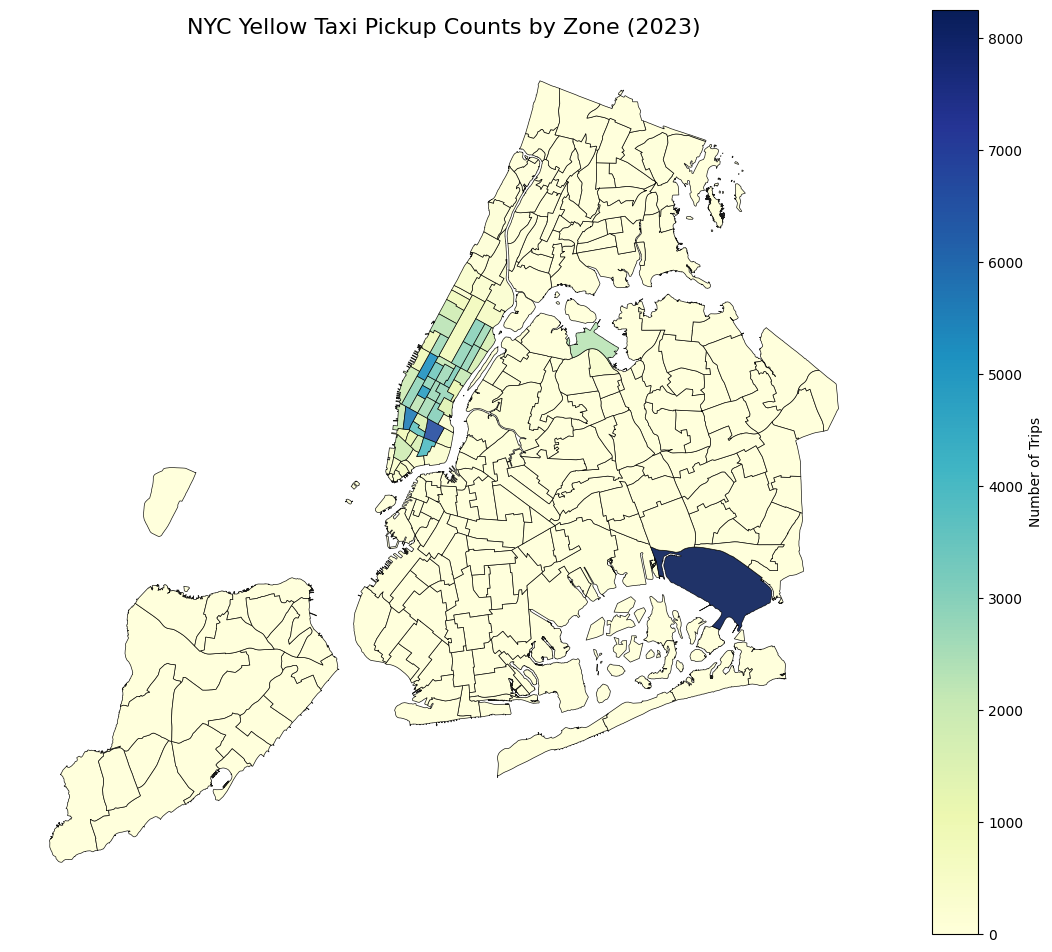

In [ ]:
# Define figure and axis


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14, 12))


zones_with_data.plot(
    column='trip_count',
    cmap='YlGnBu',
    linewidth=0.5,
    ax=ax,
    edgecolor='black',
    alpha=0.9,
    legend=True,
    legend_kwds={'label': "Number of Trips", 'orientation': 'vertical'}
)

ax.set_title('NYC Yellow Taxi Pickup Counts by Zone (2023)', fontsize=16)
ax.axis('off')

plt.show()



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?

zones_with_data = zones.merge(zone_trip_counts, on='PULocationID', how='left')
zones_with_data['trip_count'] = zones_with_data['trip_count'].fillna(0)
top_zones = zones_with_data.sort_values('trip_count', ascending=False)

cols = ['PULocationID', 'trip_count']
cols += [col for col in ['zone', 'borough'] if col in top_zones.columns]

top_10 = top_zones[cols].head(10).reset_index(drop=True)

top_10


PULocationID  trip_count                          zone    borough
0           132      8255.0                   JFK Airport     Queens
1            79      6643.0                  East Village  Manhattan
2           249      5603.0                  West Village  Manhattan
3            48      5174.0                  Clinton East  Manhattan
4           186      4852.0  Penn Station/Madison Sq West  Manhattan
5           148      3934.0               Lower East Side  Manhattan
6           114      3586.0       Greenwich Village South  Manhattan
7           230      3333.0     Times Sq/Theatre District  Manhattan
8           162      3065.0                  Midtown East  Manhattan
9           107      2999.0                      Gramercy  Manhattan

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


1. Busiest hour, day, month


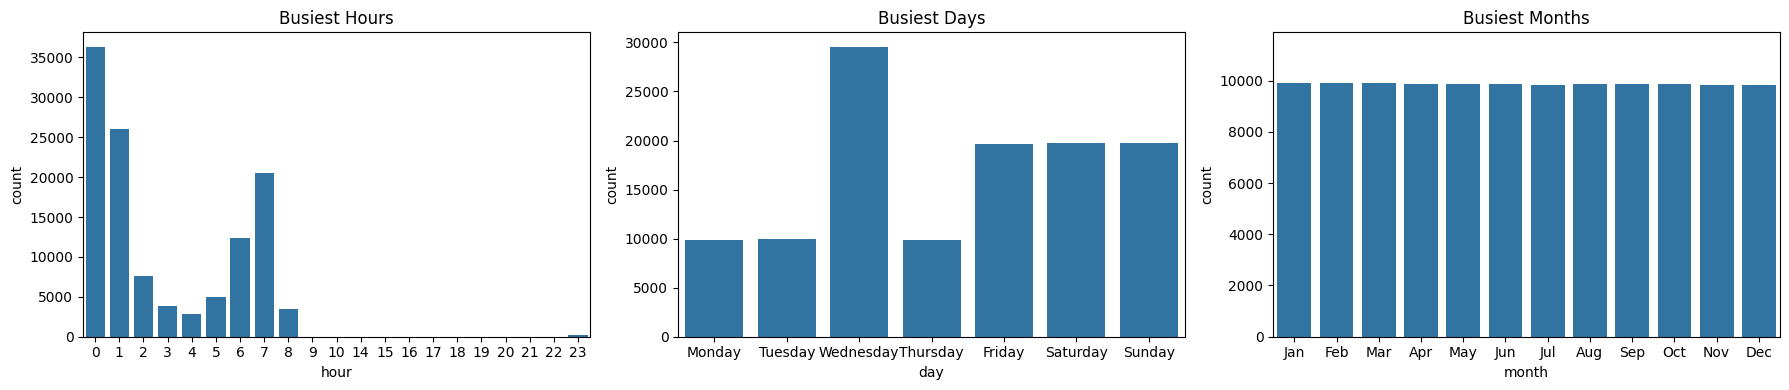



2. Trends in revenue collected


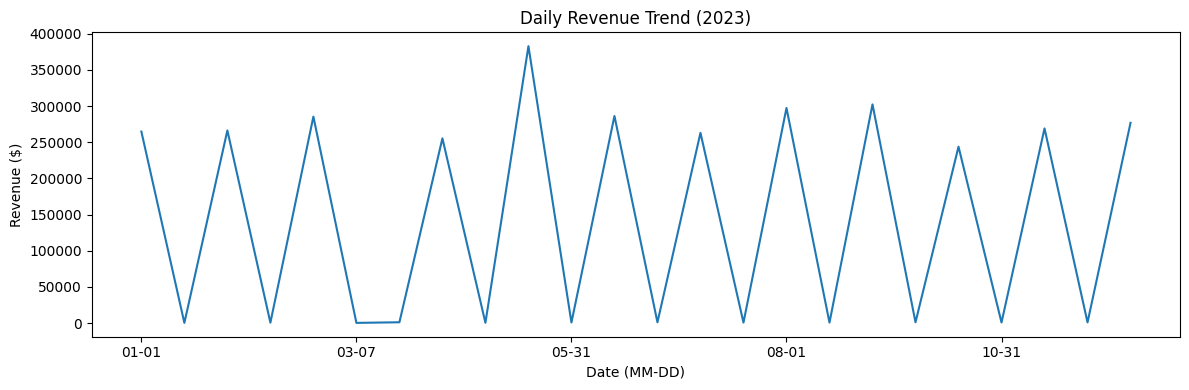



3. Trends in quarterly revenue


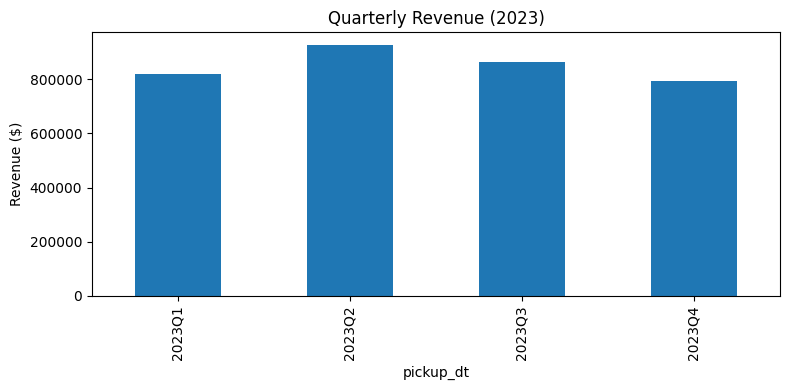



4. Fare vs Distance, Duration, Passenger Count


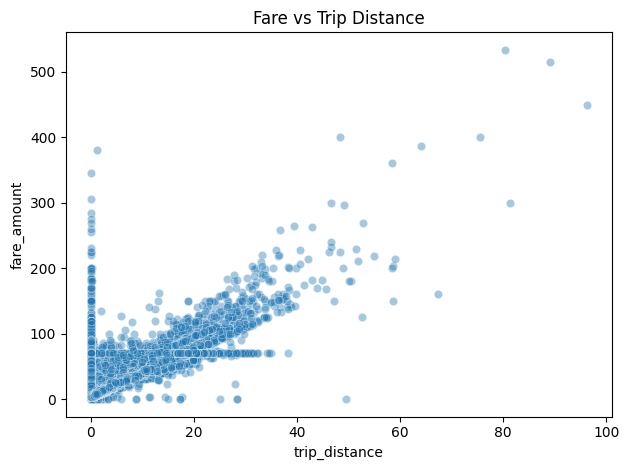

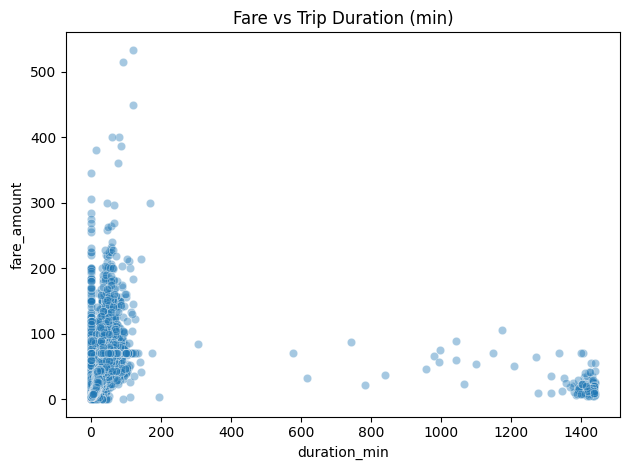

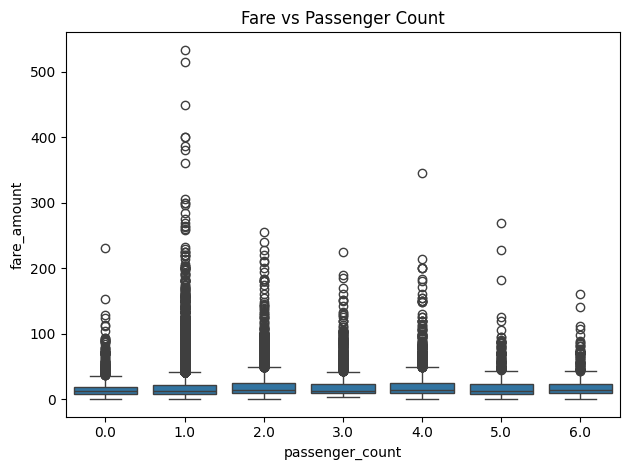



5. Tip vs Distance


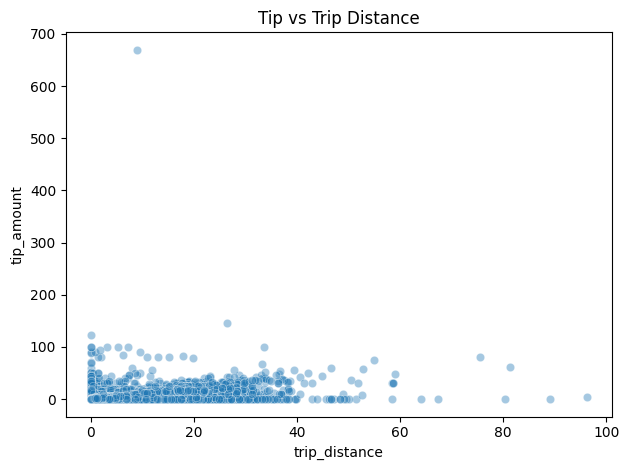



6. Busiest Zones


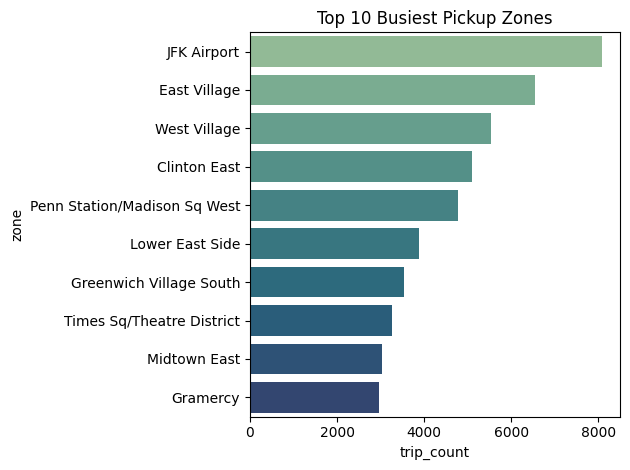

In [ ]:
df_sampled_all['pickup_dt'] = pd.to_datetime(df_sampled_all['tpep_pickup_datetime'])
df_sampled_all['dropoff_dt'] = pd.to_datetime(df_sampled_all['tpep_dropoff_datetime'])
df_sampled_all['hour'] = df_sampled_all['pickup_dt'].dt.hour
df_sampled_all['day'] = df_sampled_all['pickup_dt'].dt.day_name()
df_sampled_all['month'] = df_sampled_all['pickup_dt'].dt.strftime('%b')
df_sampled_all['quarter'] = df_sampled_all['pickup_dt'].dt.to_period('Q')
df_sampled_all['duration_min'] = (df_sampled_all['dropoff_dt'] - df_sampled_all['pickup_dt']).dt.total_seconds() / 60

df_sampled_all = df_sampled_all[df_sampled_all['fare_amount'] >= 0]


print("1. Busiest hour, day, month")
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
sns.countplot(data=df_sampled_all, x='hour', ax=axs[0])
axs[0].set_title('Busiest Hours')
sns.countplot(data=df_sampled_all, x='day', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ax=axs[1])
axs[1].set_title('Busiest Days')
sns.countplot(data=df_sampled_all, x='month', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ax=axs[2])
axs[2].set_title('Busiest Months')
axs[2].set_ylim(0, df_sampled_all['month'].value_counts().max() * 1.2)
plt.tight_layout()
plt.show()

print("\n")

print("2. Trends in revenue collected")
rev_day = df_sampled_all[df_sampled_all['pickup_dt'].dt.year == 2023]
daily_revenue = rev_day.groupby(rev_day['pickup_dt'].dt.strftime('%m-%d'))['total_amount'].sum()
daily_revenue.plot(title='Daily Revenue Trend (2023)', figsize=(12, 4))
plt.ylabel('Revenue ($)')
plt.xlabel('Date (MM-DD)')
plt.tight_layout()
plt.show()

print("\n")

print("3. Trends in quarterly revenue")
qtr_revenue = df_sampled_all[df_sampled_all['pickup_dt'].dt.year == 2023]
qtr_group = qtr_revenue.groupby(qtr_revenue['pickup_dt'].dt.to_period('Q'))['total_amount'].sum()
qtr_group.plot(kind='bar', title='Quarterly Revenue (2023)', ylabel='Revenue ($)', figsize=(8, 4))
plt.tight_layout()
plt.show()

print("\n")

print("4. Fare vs Distance, Duration, Passenger Count")
sns.scatterplot(data=df_sampled_all, x='trip_distance', y='fare_amount', alpha=0.4)
plt.title('Fare vs Trip Distance')
plt.tight_layout()
plt.show()

sns.scatterplot(data=df_sampled_all, x='duration_min', y='fare_amount', alpha=0.4)
plt.title('Fare vs Trip Duration (min)')
plt.tight_layout()
plt.show()

sns.boxplot(data=df_sampled_all, x='passenger_count', y='fare_amount')
plt.title('Fare vs Passenger Count')
plt.tight_layout()
plt.show()

print("\n")

print("5. Tip vs Distance")
sns.scatterplot(data=df_sampled_all, x='trip_distance', y='tip_amount', alpha=0.4)
plt.title('Tip vs Trip Distance')
plt.tight_layout()
plt.show()

print("\n")

print("6. Busiest Zones")
zone_names = zones[['PULocationID', 'zone']].drop_duplicates()
zone_counts = df_sampled_all['PULocationID'].value_counts().reset_index()
zone_counts.columns = ['PULocationID', 'trip_count']
top_zones = zone_counts.merge(zone_names, on='PULocationID', how='left').dropna().head(10)

sns.barplot(data=top_zones, x='trip_count', y='zone', palette='crest')
plt.title('Top 10 Busiest Pickup Zones')
plt.tight_layout()
plt.show()


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day

taxi_df = df_sampled_all.copy()
taxi_df['tpep_pickup_datetime'] = pd.to_datetime(taxi_df['tpep_pickup_datetime'])
taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df['tpep_dropoff_datetime'])

taxi_df['pickup_hour'] = taxi_df['tpep_pickup_datetime'].dt.hour
taxi_df['trip_duration_min'] = (taxi_df['tpep_dropoff_datetime'] - taxi_df['tpep_pickup_datetime']).dt.total_seconds() / 60
valid_trips = taxi_df[
    (taxi_df['trip_distance'] > 0) &
    (taxi_df['trip_duration_min'] > 0) &
    (taxi_df['trip_duration_min'] <= 120)
]
hourly_route_stats = valid_trips.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    mean_distance=('trip_distance', 'mean'),
    mean_duration=('trip_duration_min', 'mean'),
    total_trips=('trip_distance', 'count')
).reset_index()
hourly_route_stats['average_speed'] = hourly_route_stats['mean_distance'] / hourly_route_stats['mean_duration']

slowest_per_hour = (
    hourly_route_stats
    .sort_values(['pickup_hour', 'average_speed'])
    .groupby('pickup_hour', as_index=False)
    .first()
    .sort_values('pickup_hour')
)

slowest_per_hour[['pickup_hour', 'PULocationID', 'DOLocationID', 'average_speed', 'mean_duration', 'total_trips']].head(10)


pickup_hour  PULocationID  DOLocationID  average_speed  mean_duration  \
0            0            76            76       0.018750       0.533333   
1            1            45           232       0.024793       4.033333   
2            2           219            75       0.048310      68.308333   
3            3           249           249       0.012500       0.800000   
4            4           244           243       0.016807       5.950000   
5            5           163           265       0.000466      42.950000   
6            6            51           189       0.005409      55.466667   
7            7           117            17       0.002850      70.183333   
8            8            49            49       0.001831      54.616667   
9            9           107           141       0.110484      24.800000   

   total_trips  
0            2  
1            1  
2            2  
3            2  
4            1  
5            1  
6            1  
7            1  
8            1  
9            1

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour: 0:00 with 9691 trips


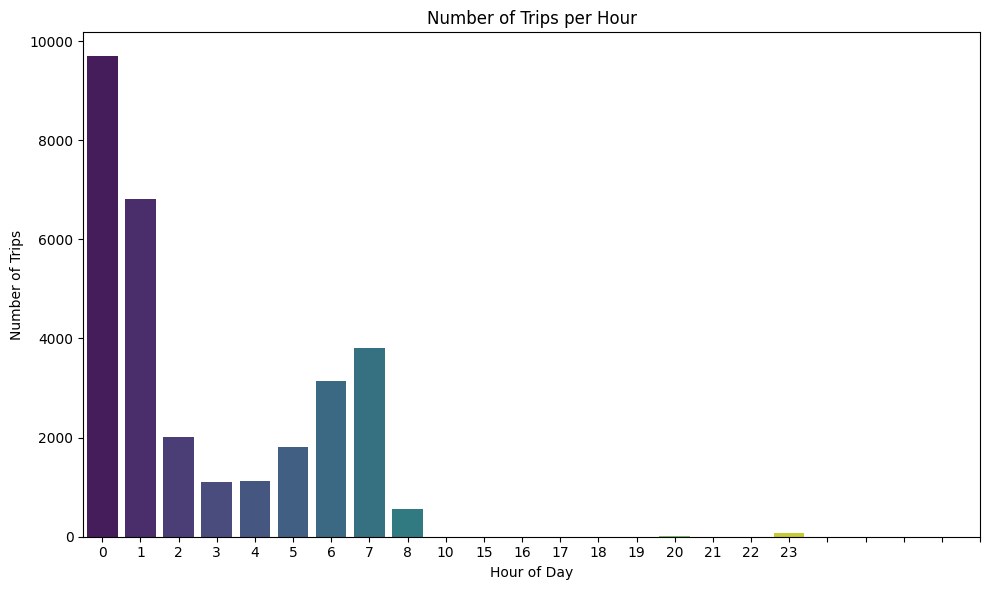

In [ ]:
# Visualise the number of trips per hour and find the busiest hour

hourly_counts = df['pickup_hour'].value_counts().sort_index()

busiest_hour = hourly_counts.idxmax()
print(f"Busiest hour: {busiest_hour}:00 with {hourly_counts.max()} trips")

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="viridis")
plt.title("Number of Trips per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))
plt.tight_layout()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

sampled_rows = 10000 * 12
total_estimated_rows = 1_200_000 * 12
sample_fraction = sampled_rows / total_estimated_rows
df_sampled_all['pickup_hour'] = pd.to_datetime(df_sampled_all['tpep_pickup_datetime']).dt.hour

hourly_counts = df_sampled_all.groupby('pickup_hour').size().reset_index(name='sampled_trip_count')
top5_hours = hourly_counts.sort_values(by='sampled_trip_count', ascending=False).head(5).sort_values('pickup_hour')
sample_fraction = 120000 / 14400000
top5_hours['estimated_total_trips'] = (top5_hours['sampled_trip_count'] / sample_fraction).astype(int)
top5_hours.index = range(1, 6)
top5_hours

pickup_hour  sampled_trip_count  estimated_total_trips
1            0               36843                4421160
2            1               26463                3175560
3            2                7746                 929520
4            6               12461                1495320
5            7               20722                2486640

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

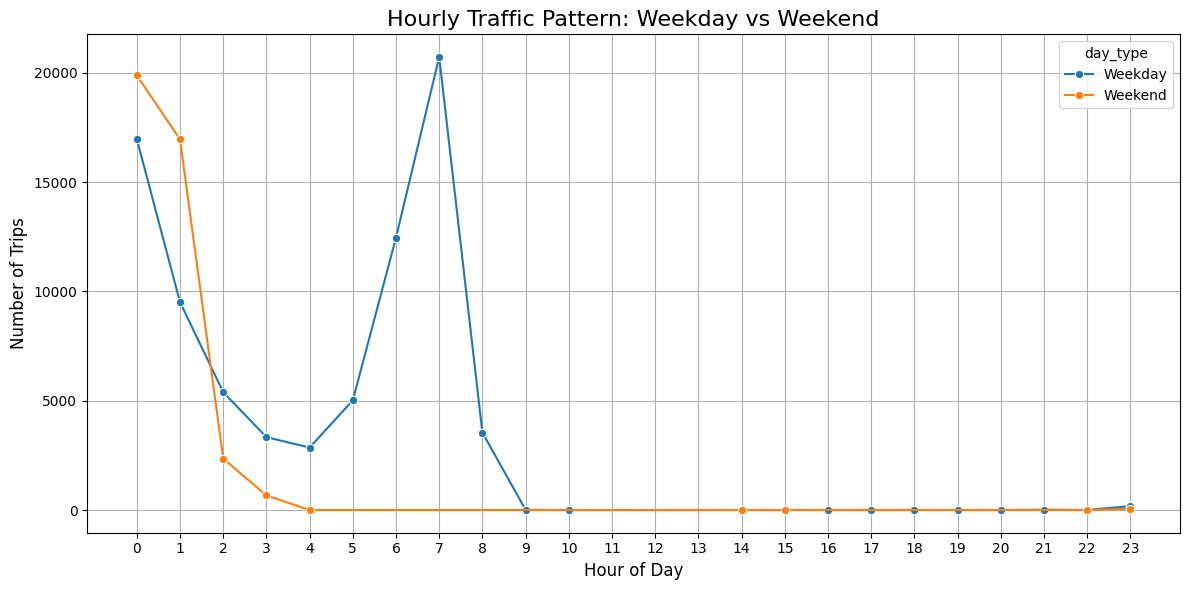

In [ ]:
# Compare traffic trends for the week days and weekends

df_sampled_all['pickup_datetime'] = pd.to_datetime(df_sampled_all['tpep_pickup_datetime'])
df_sampled_all['pickup_hour'] = df_sampled_all['pickup_datetime'].dt.hour
df_sampled_all['pickup_dayofweek'] = df_sampled_all['pickup_datetime'].dt.dayofweek

df_sampled_all['day_type'] = df_sampled_all['pickup_dayofweek'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

hourly_traffic = df_sampled_all.groupby(['day_type', 'pickup_hour']).size().reset_index(name='trip_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_traffic, x='pickup_hour', y='trip_count', hue='day_type', marker='o')

plt.title('Hourly Traffic Pattern: Weekday vs Weekend', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

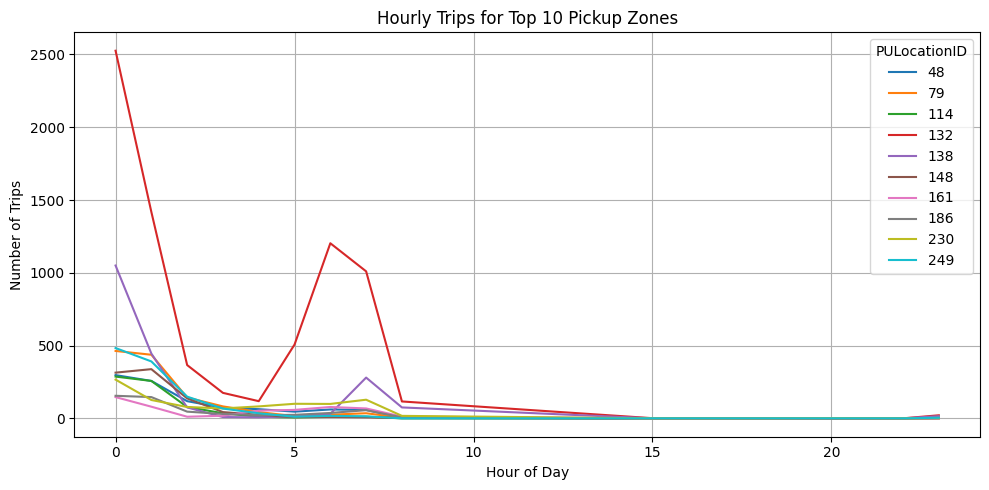

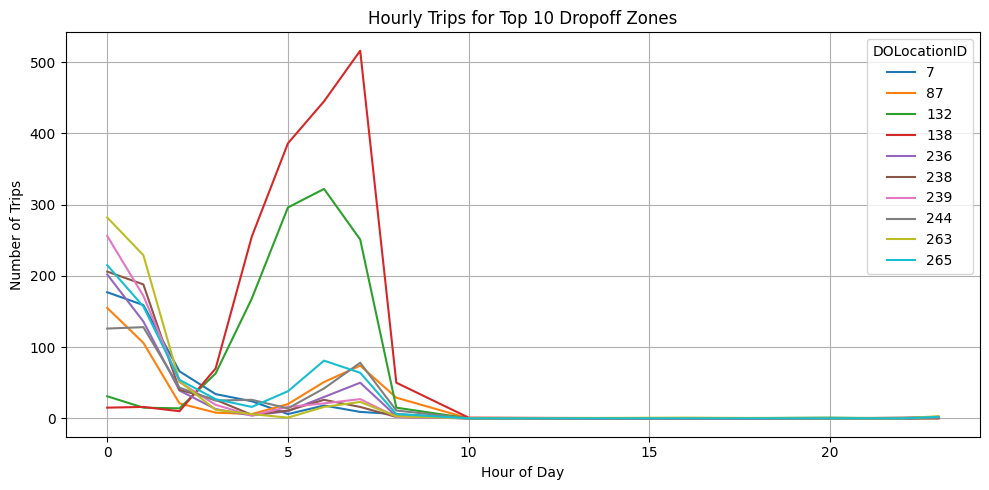

In [ ]:
# Find top 10 pickup and dropoff zones

top_pu = df['PULocationID'].value_counts().head(10).index
top_do = df['DOLocationID'].value_counts().head(10).index

# top pickup zones
pickup_hourly = df[df['PULocationID'].isin(top_pu)].groupby(['pickup_hour', 'PULocationID']).size().unstack().fillna(0)

# top dropoff zones
dropoff_hourly = df[df['DOLocationID'].isin(top_do)].groupby(['pickup_hour', 'DOLocationID']).size().unstack().fillna(0)

# Plot for the top 10 pickup zones
plt.figure(figsize=(10, 5))
pickup_hourly.plot(title='Hourly Trips for Top 10 Pickup Zones', ax=plt.gca())
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n")
# Plot for the top 10 dropoff zones
plt.figure(figsize=(10, 5))
dropoff_hourly.plot(title='Hourly Trips for Top 10 Dropoff Zones', ax=plt.gca())
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Counting pickups by zone
pickup_counts = df_sampled_all['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

# Counting dropoffs by zone
dropoff_counts = df_sampled_all['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']

zone_flow = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)
zone_flow = zone_flow[zone_flow['dropoff_count'] > 0]
zone_flow['pickup_drop_ratio'] = zone_flow['pickup_count'] / zone_flow['dropoff_count']

zone_names = zones[['PULocationID', 'zone']].rename(columns={'PULocationID': 'LocationID', 'zone': 'Zone'})
zone_flow_named = pd.merge(zone_flow, zone_names, on='LocationID', how='left')
top10 = zone_flow_named.sort_values('pickup_drop_ratio', ascending=False).head(10)
bottom10 = zone_flow_named.sort_values('pickup_drop_ratio', ascending=True).head(10)

print("Top 10 Zones with Highest Pickup/Dropoff Ratios:")
display(top10[['Zone', 'pickup_count', 'dropoff_count', 'pickup_drop_ratio']])
print("\n")
print("Bottom 10 Zones with Lowest Pickup/Dropoff Ratios:")
display(bottom10[['Zone', 'pickup_count', 'dropoff_count', 'pickup_drop_ratio']])


Top 10 Zones with Highest Pickup/Dropoff Ratios:


Zone  pickup_count  dropoff_count  \
126                    JFK Airport        8255.0           1486   
68                   East Elmhurst         322.0             92   
108        Greenwich Village South        3586.0           1119   
204       South Beach/Dongan Hills           6.0              2   
238                   West Village        5603.0           2064   
178   Penn Station/Madison Sq West        4852.0           2142   
142                Lower East Side        3934.0           1849   
152  Meatpacking/West Village West        1997.0            983   
98                Garment District        2823.0           1394   
77                    East Village        6643.0           3418   

     pickup_drop_ratio  
126           5.555182  
68            3.500000  
108           3.204647  
204           3.000000  
238           2.714632  
178           2.265173  
142           2.127637  
152           2.031536  
98            2.025108  
77            1.943534



Bottom 10 Zones with Lowest Pickup/Dropoff Ratios:


Zone  pickup_count  dropoff_count  \
3                         Arden Heights           0.0              2   
6                          Astoria Park           0.0              7   
25  Breezy Point/Fort Tilden/Riis Beach           0.0              3   
28                        Broad Channel           0.0              4   
55                                  NaN           0.0              5   
56                         Country Club           0.0              3   
57                         Crotona Park           0.0              1   
43                          City Island           0.0              1   
97                      Freshkills Park           0.0              1   
99                            Glen Oaks           0.0             18   

    pickup_drop_ratio  
3                 0.0  
6                 0.0  
25                0.0  
28                0.0  
55                0.0  
56                0.0  
57                0.0  
43                0.0  
97                0.0  
99                0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

df_sampled_all['pickup_datetime'] = pd.to_datetime(df_sampled_all['tpep_pickup_datetime'])
df_sampled_all['pickup_hour'] = df_sampled_all['pickup_datetime'].dt.hour
night_hours = df_sampled_all[(df_sampled_all['pickup_hour'] >= 23) | (df_sampled_all['pickup_hour'] <= 4)]
pickup_counts_night = night_hours['PULocationID'].value_counts().reset_index()
pickup_counts_night.columns = ['LocationID', 'night_pickup_count']
dropoff_counts_night = night_hours['DOLocationID'].value_counts().reset_index()
dropoff_counts_night.columns = ['LocationID', 'night_dropoff_count']

zone_info = zones[['PULocationID', 'zone']].rename(columns={'PULocationID': 'LocationID', 'zone': 'Zone'})

pickup_zones_night = pd.merge(pickup_counts_night, zone_info, on='LocationID', how='left')
dropoff_zones_night = pd.merge(dropoff_counts_night, zone_info, on='LocationID', how='left')

print("Top 10 Pickup Zones (11 PM – 5 AM):")
display(pickup_zones_night.head(10)[['Zone', 'night_pickup_count']])

print("\n")
print("Top 10 Dropoff Zones (11 PM – 5 AM):")
display(dropoff_zones_night.head(10)[['Zone', 'night_dropoff_count']])


Top 10 Pickup Zones (11 PM – 5 AM):


Zone  night_pickup_count
0               East Village                6048
1                JFK Airport                5130
2               West Village                5047
3            Lower East Side                3827
4               Clinton East                3594
5    Greenwich Village South                3438
6  Times Sq/Theatre District                2420
7               East Chelsea                2146
8              Midtown South                2097
9                   Gramercy                2058



Top 10 Dropoff Zones (11 PM – 5 AM):


Zone  night_dropoff_count
0                   East Village                 3152
1                   Clinton East                 2640
2                    Murray Hill                 2244
3                       Gramercy                 2062
4                   East Chelsea                 2023
5                 Yorkville West                 1954
6                Lenox Hill West                 1914
7                   West Village                 1827
8                Lower East Side                 1742
9  Sutton Place/Turtle Bay North                 1648

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)

df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df_valid_revenue = df[df['total_amount'] > 0]

night_hours = [23, 0, 1, 2, 3, 4, 5]
df_valid_revenue['time_period'] = 'Day'
df_valid_revenue.loc[df_valid_revenue['pickup_hour'].isin(night_hours), 'time_period'] = 'Night'
revenue_by_time = df_valid_revenue.groupby('time_period')['total_amount'].sum().reset_index()
revenue_by_time.columns = ['Time Period', 'Total Revenue ($)']
total_revenue = revenue_by_time['Total Revenue ($)'].sum()
revenue_by_time['Revenue Share (%)'] = (revenue_by_time['Total Revenue ($)'] / total_revenue * 100).round(2)

revenue_by_time = revenue_by_time.sort_values('Time Period')

print("Revenue Share by Time Period (Only Valid Revenues Included):")
display(revenue_by_time)


Revenue Share by Time Period (Only Valid Revenues Included):


Time Period  Total Revenue ($)  Revenue Share (%)
0         Day       11532.838628              31.48
1       Night       25103.841658              68.52

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

filtered_df = df[
    (df['trip_distance'] > 0) &
    (df['total_amount'] > 0) &
    (df['passenger_count'] > 0)
].copy()

filtered_df['fare_per_mile'] = filtered_df['total_amount'] / filtered_df['trip_distance']
filtered_df['fare_per_mile_per_passenger'] = filtered_df['fare_per_mile'] / filtered_df['passenger_count']

fare_stats = filtered_df.groupby('passenger_count').agg({
    'fare_per_mile': 'mean',
    'fare_per_mile_per_passenger': 'mean'
}).round(2).reset_index()

fare_stats.index = range(1, len(fare_stats) + 1)
print("Average Fare per Mile and Fare per Mile per Passenger by Passenger Count:")
display(fare_stats)


Average Fare per Mile and Fare per Mile per Passenger by Passenger Count:


passenger_count  fare_per_mile  fare_per_mile_per_passenger
1              1.0           2.16                         2.16
2              2.0           4.28                         2.14
3              3.0           3.63                         1.21
4              4.0           2.58                         0.64
5              5.0           1.61                         0.32
6              6.0           1.46                         0.24

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

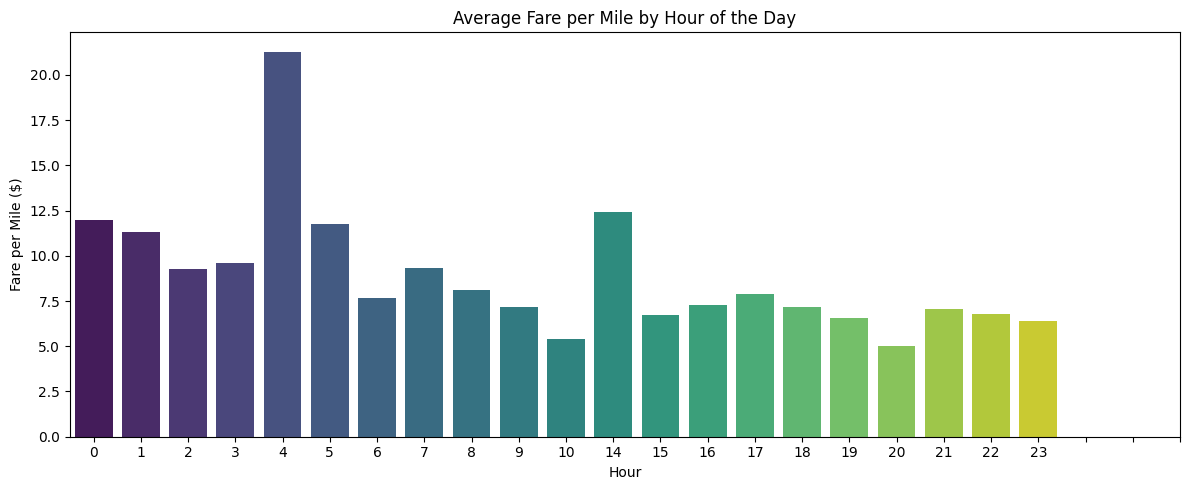

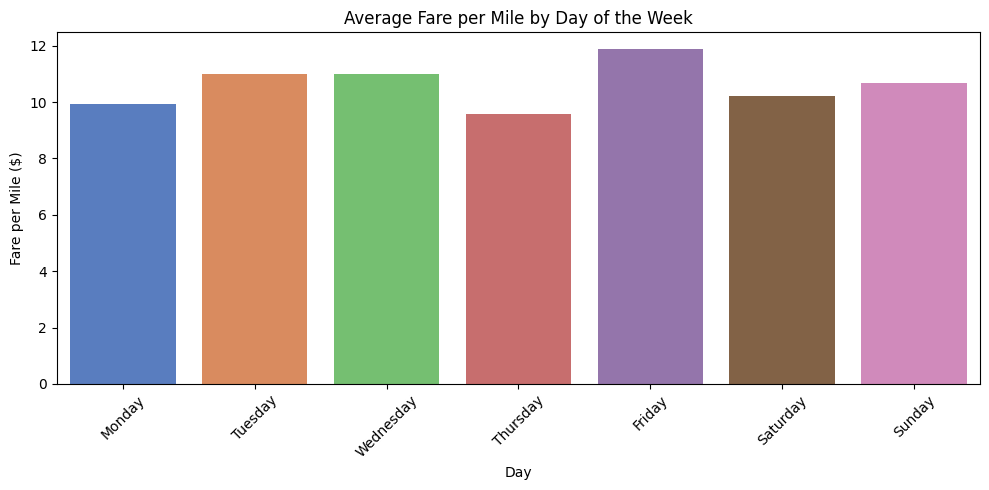

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

df_fare_mile = df_sampled_all[(df_sampled_all['fare_amount'] > 0) & (df_sampled_all['trip_distance'] > 0)].copy()
df_fare_mile['fare_per_mile'] = df_fare_mile['fare_amount'] / df_fare_mile['trip_distance']
df_fare_mile['pickup_hour'] = pd.to_datetime(df_fare_mile['tpep_pickup_datetime']).dt.hour
df_fare_mile['pickup_day'] = pd.to_datetime(df_fare_mile['tpep_pickup_datetime']).dt.day_name()
hourly_fare = df_fare_mile.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(data=hourly_fare, x='pickup_hour', y='fare_per_mile', palette='viridis')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()
print("\n")

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_fare = df_fare_mile.groupby('pickup_day')['fare_per_mile'].mean().reindex(days_order).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=day_fare, x='pickup_day', y='fare_per_mile', palette='muted')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

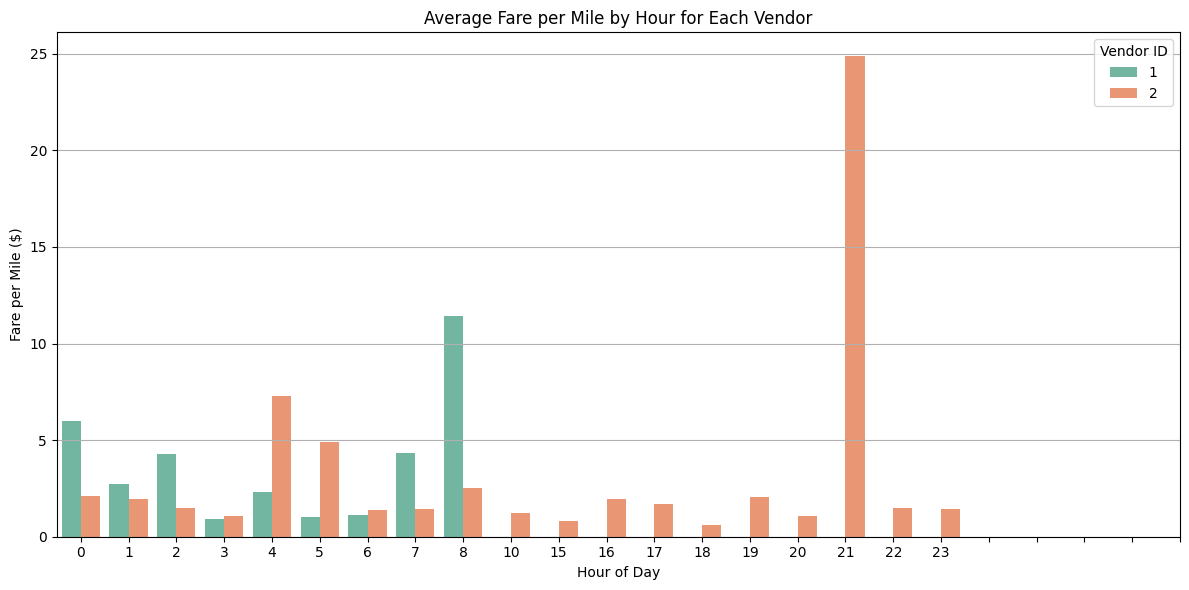

In [ ]:
# Compare fare per mile for different vendors

df_valid = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)].copy()
df_valid['fare_per_mile'] = df_valid['total_amount'] / df_valid['trip_distance']
df_valid['pickup_hour'] = df_valid['tpep_pickup_datetime'].dt.hour
avg_fare_by_vendor_hour = df_valid.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_fare_by_vendor_hour, x='pickup_hour', y='fare_per_mile', hue='VendorID', palette='Set2')

plt.title('Average Fare per Mile by Hour for Each Vendor')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.grid(True, axis='y')
plt.legend(title='Vendor ID')
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


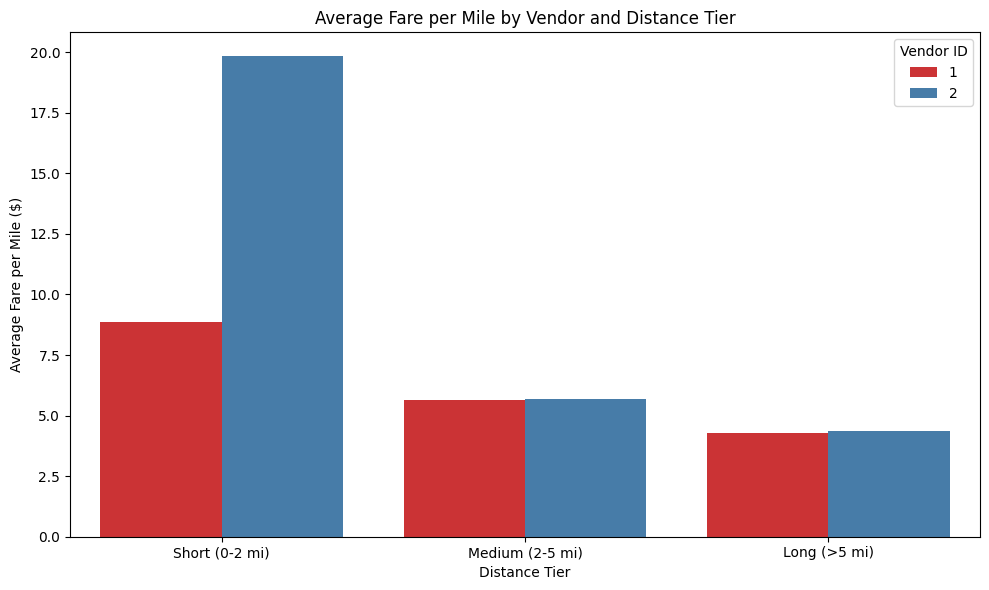

In [ ]:
# Defining distance tiers

df_fares = df_sampled_all[(df_sampled_all['trip_distance'] > 0) & (df_sampled_all['fare_amount'] > 0)].copy()
df_fares['distance_tier'] = pd.cut(
    df_fares['trip_distance'],
    bins=[0, 2, 5, float('inf')],
    labels=['Short (0-2 mi)', 'Medium (2-5 mi)', 'Long (>5 mi)']
)
df_fares['fare_per_mile'] = df_fares['fare_amount'] / df_fares['trip_distance']

tiered_vendor_fares = df_fares.groupby(['VendorID', 'distance_tier']).agg(
    avg_fare_per_mile=('fare_per_mile', 'mean'),
    trip_count=('fare_per_mile', 'count')
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_vendor_fares, x='distance_tier', y='avg_fare_per_mile', hue='VendorID', palette='Set1')

plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile ($)')
plt.legend(title='Vendor ID')
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_valid = df[
    (df['tip_amount'] >= 0) &
    (df['fare_amount'] > 0) &
    (df['tip_amount'] <= df['fare_amount'])
].copy()
df_valid['tip_percentage'] = 100 * df_valid['tip_amount'] / df_valid['fare_amount']
bins = [0, 2, 5, 10, 20, 50]
labels = ['0–2 miles', '2–5 miles', '5–10 miles', '10–20 miles', '20–50 miles']
df_valid['Distance Range'] = pd.cut(df_valid['trip_distance'], bins=bins, labels=labels)
df_valid['Pickup Hour'] = df_valid['tpep_pickup_datetime'].dt.hour

avg_tip_by_distance = df_valid.groupby('Distance Range', observed=True)['tip_percentage'].mean().rename("Average Tip %")
avg_tip_by_passenger = df_valid.groupby('passenger_count')['tip_percentage'].mean().rename("Average Tip %")
avg_tip_by_hour = df_valid.groupby('Pickup Hour')['tip_percentage'].mean().rename("Average Tip %")

print("Average Tip % by Trip Distance:\n", avg_tip_by_distance, "\n")
print("Average Tip % by Passenger Count:\n", avg_tip_by_passenger, "\n")
print("Average Tip % by Pickup Hour:\n", avg_tip_by_hour, "\n")


Average Tip % by Trip Distance:
 Distance Range
0–2 miles      51.471244
2–5 miles      52.925113
5–10 miles     53.586251
10–20 miles    57.895059
Name: Average Tip %, dtype: float64 

Average Tip % by Passenger Count:
 passenger_count
1.0    52.219757
2.0    52.181403
3.0    50.313884
4.0    54.292789
5.0    54.024576
6.0    48.585385
Name: Average Tip %, dtype: float64 

Average Tip % by Pickup Hour:
 Pickup Hour
0     54.147690
1     52.622177
2     50.123936
3     49.049974
4     44.152765
5     50.623815
6     52.021588
7     51.189186
8     53.362290
10    48.577092
17    74.928859
20    43.538536
22    26.646491
23    46.843786
Name: Average Tip %, dtype: float64 



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df_valid = df[
    (df['tip_amount'] >= 0) &
    (df['fare_amount'] > 0) &
    (df['tip_amount'] <= df['fare_amount'])
].copy()
df_valid['tip_percentage'] = 100 * df_valid['tip_amount'] / df_valid['fare_amount']
df_valid['Pickup Hour'] = df_valid['tpep_pickup_datetime'].dt.hour
low_tippers = df_valid[df_valid['tip_percentage'] < 10]
high_tippers = df_valid[df_valid['tip_percentage'] > 25]

low_avg = low_tippers[['trip_distance', 'passenger_count', 'Pickup Hour']].mean()
low_avg.index = ['Avg Trip Distance', 'Avg Passenger Count', 'Avg Pickup Hour']
low_avg.name = "Low Tip (<10%) – Averages"

high_avg = high_tippers[['trip_distance', 'passenger_count', 'Pickup Hour']].mean()
high_avg.index = ['Avg Trip Distance', 'Avg Passenger Count', 'Avg Pickup Hour']
high_avg.name = "High Tip (>25%) – Averages"

print(low_avg.to_frame())
print()
print(high_avg.to_frame())


                     Low Tip (<10%) – Averages
Avg Trip Distance                     1.987317
Avg Passenger Count                   1.408537
Avg Pickup Hour                       3.189024

                     High Tip (>25%) – Averages
Avg Trip Distance                      1.945910
Avg Passenger Count                    1.414657
Avg Pickup Hour                        2.874048


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days

df_valid['pickup_hour'] = df_valid['tpep_pickup_datetime'].dt.hour
df_valid['pickup_day'] = df_valid['tpep_pickup_datetime'].dt.day_name()

hourly_passenger_avg = df_valid.groupby('pickup_hour')['passenger_count'].mean().reset_index()
hourly_passenger_avg.columns = ['Pickup Hour',  'Average Passengers']

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_passenger_avg = df_valid.groupby('pickup_day')['passenger_count'].mean().reindex(ordered_days).reset_index()
daily_passenger_avg.columns = ['Day of Week',   '            Average Passengers']

print("Average Passenger Count by Pickup Hour:\n")
print(hourly_passenger_avg.to_string(index=False))

print("\nAverage Passenger Count by Day of Week:\n")
print(daily_passenger_avg.to_string(index=False))


Average Passenger Count by Pickup Hour:

 Pickup Hour  Average Passengers
           0            1.427481
           1            1.435969
           2            1.424258
           3            1.487524
           4            1.370064
           5            1.336599
           6            1.385647
           7            1.391761
           8            1.369524
          10            1.000000
          15            1.000000
          16            1.000000
          17            1.000000
          18            1.000000
          19            1.000000
          20            1.200000
          21            1.000000
          22            1.666667
          23            1.635135

Average Passenger Count by Day of Week:

Day of Week              Average Passengers
     Monday                        1.340619
    Tuesday                        1.407638
  Wednesday                        1.373678
   Thursday                        1.397237
     Friday                        1.

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones

from tabulate import tabulate

avg_passenger_by_zone = df_valid.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.columns = ['Location ID', 'Average Passengers']
zones_with_passengers = zones.merge(avg_passenger_by_zone, left_on='PULocationID', right_on='Location ID')
top_zones = zones_with_passengers[['zone', 'Average Passengers']].sort_values(by='Average Passengers', ascending=False).head(10)

table = tabulate(top_zones.values.tolist(), headers=["Zone", "Average Passengers"], tablefmt="plain", stralign="left", numalign="right")
print("Top 10 Zones with Highest Average Passenger Count:\n")
print(table)


Top 10 Zones with Highest Average Passenger Count:

Zone                              Average Passengers
Fort Greene                                        4
Kew Gardens                                        3
Manhattan Valley                                 2.5
Sunnyside                                    2.36364
Bushwick North                               2.33333
Chinatown                                      2.125
Long Island City/Hunters Point                     2
Flushing Meadows-Corona Park                       2
Newark Airport                                     2
Jamaica                                            2


   PULocationID                     zone  avg_passenger_count
0             1           Newark Airport             1.785714
1             3  Allerton/Pelham Gardens             1.000000
2             4            Alphabet City             1.426124
3             6  Arrochar/Fort Wadsworth             1.400000
4             7                  Astoria             1.186047


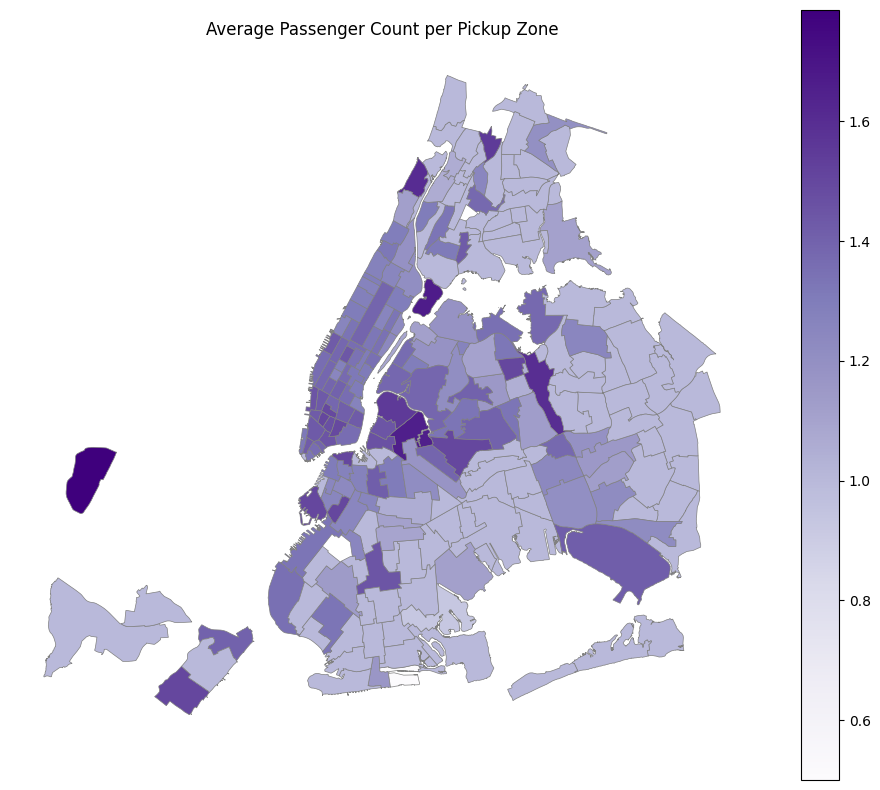

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_by_zone = df_sampled_all.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.columns = ['PULocationID', 'avg_passenger_count']
zones_with_trips = zones_with_trips.rename(columns={'LocationID': 'PULocationID'})
zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, on='PULocationID', how='left', suffixes=('', '_avg'))

zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count_avg'].fillna(0)
zones_with_trips.drop(columns=['avg_passenger_count_avg'], inplace=True)

zones_with_trips = zones_with_trips[zones_with_trips['avg_passenger_count'] != 0]
print(zones_with_trips[['PULocationID', 'zone', 'avg_passenger_count']].head())

fig, ax = plt.subplots(figsize=(12, 10))
zones_with_trips.plot(column='avg_passenger_count', cmap='Purples', legend=True, edgecolor='grey', linewidth=0.5, ax=ax)
plt.title('Average Passenger Count per Pickup Zone')
ax.axis('off')
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Percentage of Trips with Each Surcharge Applied:

Extra                    : 74.63%
Mta Tax                  : 97.34%
Congestion Surcharge     : 88.73%
Airport Fee              : 0.33%


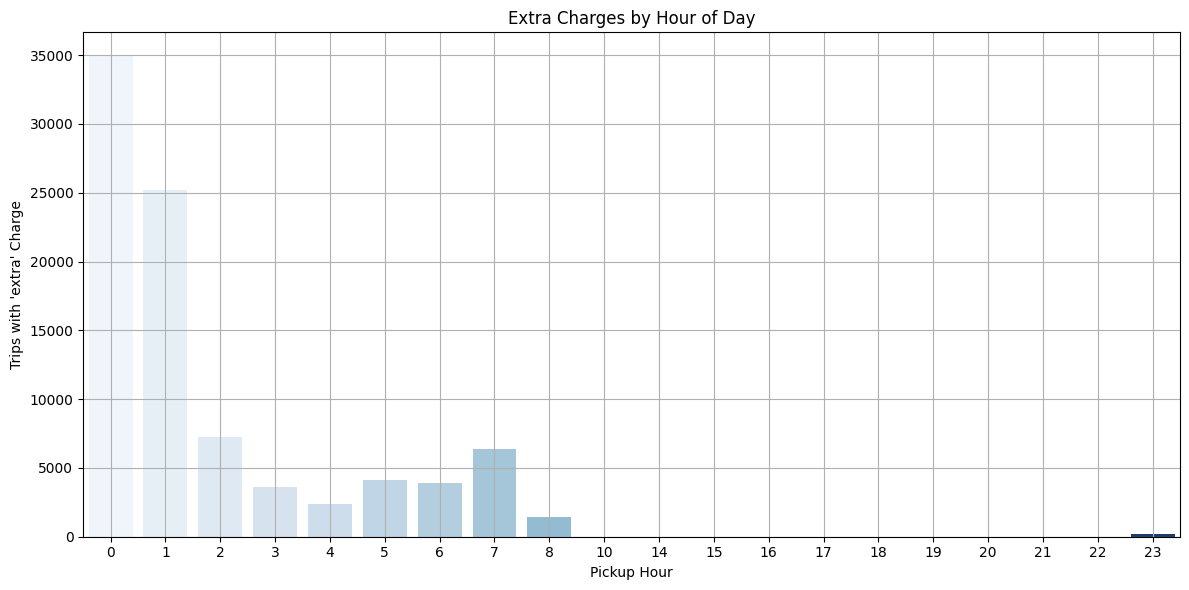


 Top 10 Pickup Zones with Most 'Extra' Charges:
                             zone  extra_trips
48                   East Village         6165
161                  West Village         5165
81                    JFK Airport         4409
29                   Clinton East         4211
95                Lower East Side         3795
69        Greenwich Village South         3444
118  Penn Station/Madison Sq West         3183
147     Times Sq/Theatre District         2745
66                       Gramercy         2362
41                   East Chelsea         2356


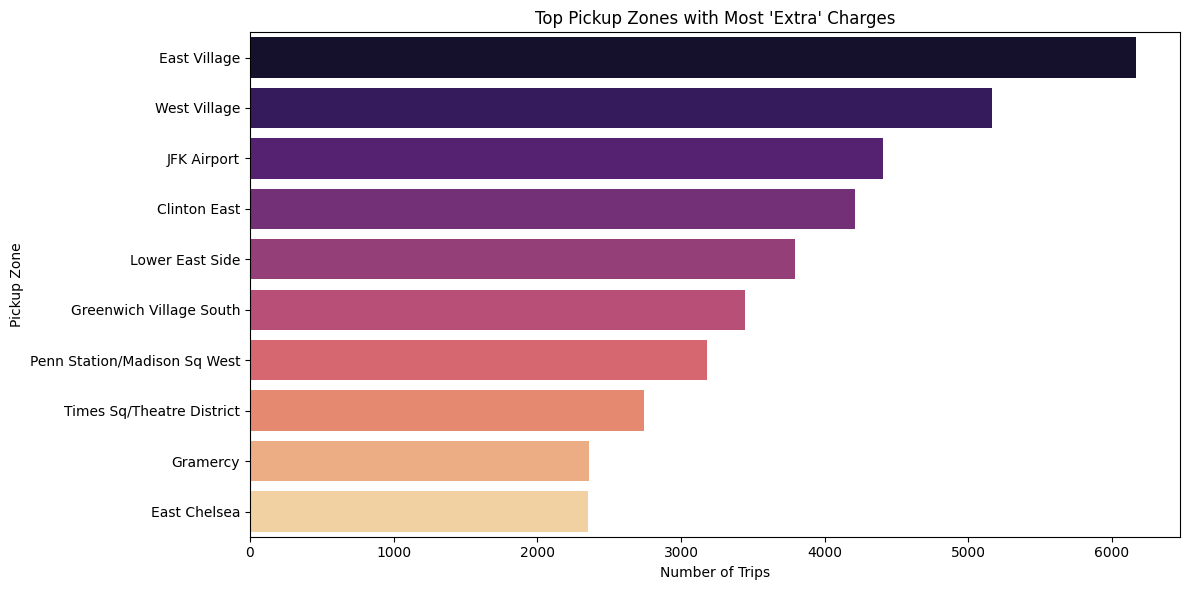

In [ ]:
# How often is each surcharge applied?

df_sampled_all['tpep_pickup_datetime'] = pd.to_datetime(df_sampled_all['tpep_pickup_datetime'])

df_sampled_all['pickup_hour'] = df_sampled_all['tpep_pickup_datetime'].dt.hour
df_sampled_all['pickup_day'] = df_sampled_all['tpep_pickup_datetime'].dt.day_name()
surcharges = ['extra', 'mta_tax', 'congestion_surcharge', 'airport_fee']

print("Percentage of Trips with Each Surcharge Applied:\n")
for col in surcharges:
    pct = (df_sampled_all[col] > 0).mean() * 100
    print(f"{col.replace('_', ' ').title():<25}: {pct:.2f}%")

plt.figure(figsize=(12, 6))
sns.countplot(data=df_sampled_all[df_sampled_all['extra'] > 0], x='pickup_hour', palette='Blues')
plt.title("Extra Charges by Hour of Day")
plt.xlabel("Pickup Hour")
plt.ylabel("Trips with 'extra' Charge")
plt.grid(True)
plt.tight_layout()
plt.show()

surcharge_by_zone = (
    df_sampled_all[df_sampled_all['extra'] > 0]
    .groupby('PULocationID')
    .size()
    .reset_index(name='extra_trips')
)
zone_lookup = zones[['PULocationID', 'zone']].drop_duplicates()
surcharge_by_zone_named = surcharge_by_zone.merge(zone_lookup, on='PULocationID', how='left')
surcharge_by_zone_named = surcharge_by_zone_named.dropna(subset=['zone'])

top_zones = surcharge_by_zone_named.sort_values('extra_trips', ascending=False).head(10)

print("\n Top 10 Pickup Zones with Most 'Extra' Charges:")
print(top_zones[['zone', 'extra_trips']])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_zones, x='extra_trips', y='zone', palette='magma')
plt.title("Top Pickup Zones with Most 'Extra' Charges")
plt.xlabel("Number of Trips")
plt.ylabel("Pickup Zone")
plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
print("""
1. More cabs should be deployed during the morning (6–9 AM) and evening (4–8 PM)
   commute hours, as trip counts are significantly higher during these periods

2. After completing long-distance trips, drivers should be directed to nearby
   hotspots such as Penn Station, Union Square, or Upper East Side instead of
   returning empty.

3. Trips with negative fares, zero passengers, or unrealistic distances should
   be filtered out to improve dispatch efficiency and reduce operational waste.
""")


1. More cabs should be deployed during the morning (6–9 AM) and evening (4–8 PM) 
   commute hours, as trip counts are significantly higher during these periods

2. After completing long-distance trips, drivers should be directed to nearby 
   hotspots such as Penn Station, Union Square, or Upper East Side instead of 
   returning empty.

3. Trips with negative fares, zero passengers, or unrealistic distances should 
   be filtered out to improve dispatch efficiency and reduce operational waste.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
print("""
1. Cab positioning should focus on high-frequency pickup zones such as
   Midtown Center, LaGuardia Airport, and the Upper East Side, which consistently
   rank among the top pickup areas.

2. Standby fleets should be placed near frequent drop-off zones such as
   Penn Station, Midtown East, and the Financial District to reduce empty return trips.

3. Dedicated fleets should be stationed near JFK Airport and LaGuardia Airport,
   timed to align with peak arrival and departure hours.
""")


1. Cab positioning should focus on high-frequency pickup zones such as 
   Midtown Center, LaGuardia Airport, and the Upper East Side, which consistently 
   rank among the top pickup areas.

2. Standby fleets should be placed near frequent drop-off zones such as 
   Penn Station, Midtown East, and the Financial District to reduce empty return trips.

3. Dedicated fleets should be stationed near JFK Airport and LaGuardia Airport, 
   timed to align with peak arrival and departure hours.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
print("""
1. Surge pricing should be introduced during high-demand commute hours
   (morning and evening), with a slight increase in base fares.

2. Tip data should be analyzed to identify routes with higher service value,
   where a premium ride option could be introduced.

3. Off-peak discounts should be offered during slower hours (e.g., midday) to
   boost ridership.
""")


1. Surge pricing should be introduced during high-demand commute hours 
   (morning and evening), with a slight increase in base fares.

2. Tip data should be analyzed to identify routes with higher service value, 
   where a premium ride option could be introduced.

3. Off-peak discounts should be offered during slower hours (e.g., midday) to 
   boost ridership.

